## 다중 회귀 개념

**(1) 변수선택법**

1️⃣ 규제가 있는 다항 회귀 모델

##### 릿지

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [2]:
from sklearn.linear_model import Ridge
import numpy as np

alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a)
    ridge.fit(x, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))
    
df_ridge=pd.DataFrame(data, index=alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-3uorx8go because the default path (/config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


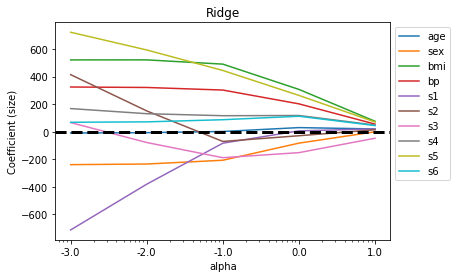

In [3]:
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1, 1))
plt.title("Ridge")
plt.xlabel("alpha")
plt.ylabel("Coefficient (size)")
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

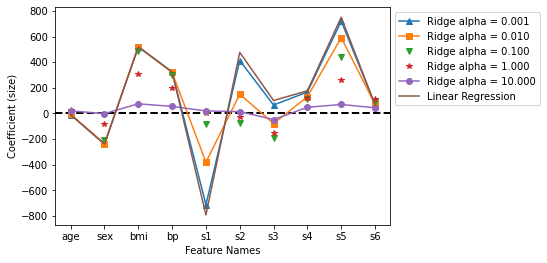

In [4]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x, y)

plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ridge.loc[0.001], '^-', label='Ridge alpha = 0.001')
plt.plot(df_ridge.loc[0.010], 's-', label='Ridge alpha = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label='Ridge alpha = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label='Ridge alpha = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label='Ridge alpha = 10.000')

plt.plot(lr.coef_, label='Linear Regression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1, 1))

##### 라쏘

In [5]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)

alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [6]:
data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a)
    lasso.fit(x, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))
    
df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


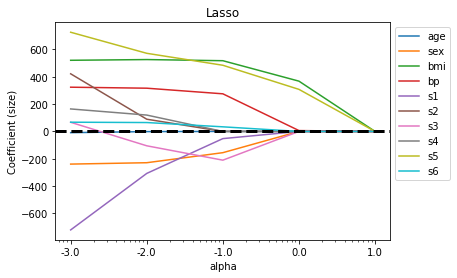

In [7]:
plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1, 1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

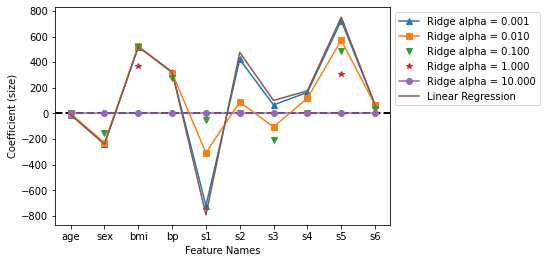

In [8]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_lasso.loc[0.001], '^-', label='Ridge alpha = 0.001')
plt.plot(df_lasso.loc[0.010], 's-', label='Ridge alpha = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label='Ridge alpha = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label='Ridge alpha = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label='Ridge alpha = 10.000')

plt.plot(lr.coef_, label='Linear Regression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1, 1))

##### 엘라스틱넷 (Elastic Net)

r=0, 릿지 회귀 효과\
r=1, 라쏘 회귀 효과

In [9]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)

data=[]
for i, a in enumerate(alpha):
    ela = ElasticNet(alpha=a, l1_ratio=0.5)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))
    
df_ela = pd.DataFrame(data, index=alpha)
df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


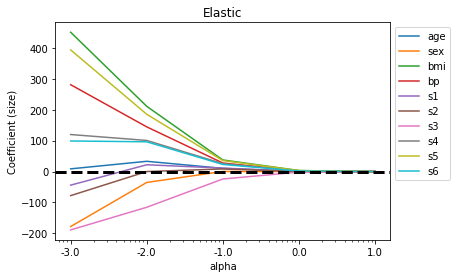

In [10]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1, 1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

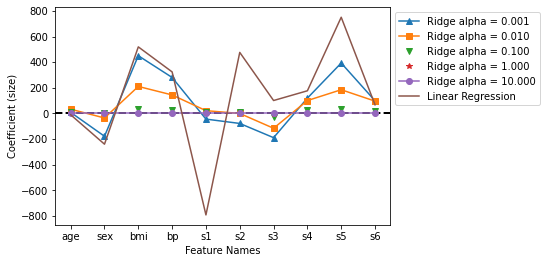

In [11]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.loc[0.001], '^-', label='Ridge alpha = 0.001')
plt.plot(df_ela.loc[0.010], 's-', label='Ridge alpha = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Ridge alpha = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Ridge alpha = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Ridge alpha = 10.000')

plt.plot(lr.coef_, label='Linear Regression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1, 1))